In [2]:
# full import

# system
import warnings
warnings.filterwarnings('ignore')

# data loading
import numpy as np
import pandas as pd
from sklearn import datasets

np.random.seed(42)

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


# preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone 

# evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# so far, we have treated Machine Learning models and their training algorithms mostly like black boxes.
# now, we will take a step closer and look into the models to see how it works.

# in this chapter, we will start by looking at the Linear Regression Model:
#   # using a direct "close form".
#   # using an iterative optimization approach: Gradient Descent (GD)
    # we will also look at a few variants of Gradient Descent:
    #   # Batch GD
    #   # Mini-Batch GD
    #   # Stochastic GD
# next, we look at the Polynomial Regression.
# finally, we will look at two more models that are commonly used for classification tasks: 
#   # Logistic Regression
#   # Softmax Regression

# Linear Regression


A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the **bias term** (also called the **intercept term**)


Linear Regression model prediction: 
> $\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$


**Notation**:
- $\hat{y}$: is the predicted value.
- $n$: is the number of features.
- $x_i$: is the $i^{th}$ feature value.
- $\theta_j$: is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1,\theta_2,...,\theta_n$)


This can be written much more concisely using a vectorized form: 
> $\hat{y} = h_\theta(x) = \theta x$


**Notation**:
- $\theta$: is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
- $x$: is the instance's *feature vector*, containing $x_0$ to $x_n$ (with $x_0 = 1$).
- $\theta x$: is the dot product of the vectors $\theta$ and $x$, which is equal to: $\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$.
- $h_\theta$: is the hypothesis function, using the model parameters $\theta$.

>> In machine learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If $\theta$ and $x$ are column vectors, then the prediction is: $\hat{y} = \theta^Tx$ (where $\theta^T$ is the *transpose* of $\theta$).


---


Okay, that's the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data.


In chapter 2, we saw that the most common performance measure of a regression model is the **Root Mean Square Error (RMSE)**. Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the **Mean Square Error (MSE)** than the RMSE, and it leads to the same result.


The MSE of a Linear Regression hypothesis $h_\theta$ on a training set $X$ is calculated as:
> $MSE(\bold{X}, h_\theta) = \dfrac{1}{m}\displaystyle\sum_{i=1}^{m}\left(\theta^Tx^{(i)}-y^{(i)}\right)^2$

---

## The Normal Equation


To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* - In other words, a mathematical equation that gives the result directly. This is called the **Normal Equation**:
> $\hat{\theta} = \left(X^TX\right)^{-1}X^Ty$
- $\hat{\theta}$: is the value of $\theta$ that minimizes the cost function.
- $y$: is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

Text(0, 0.5, '$y$')

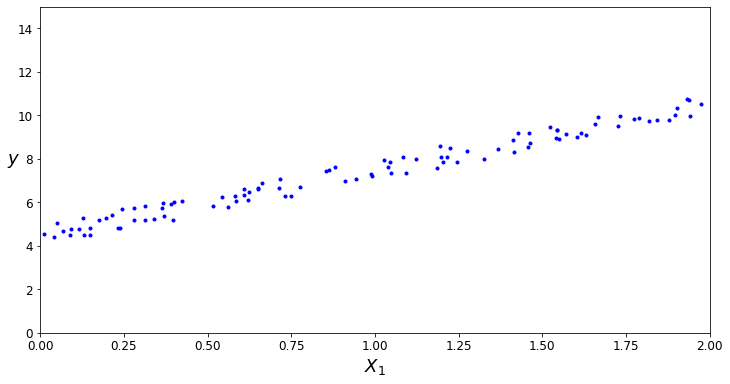

In [4]:
# let's generate some linear-looking data to test this equation

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# plot the generated data
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(X, y, 'b.')

plt.axis([0, 2, 0, 15])
plt.xlabel('$X_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)

In [5]:
# now let's compute the result using the normal equation
# we will use the inv() function from numpy's linear algebra module (np.linalg) to compute the inverse of a matrix
# and the dot() method for matrix multiplication

X_b = np.c_[np.ones((100, 1)), X] # add X0 = 1 to each instance
theta_best = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T), y)

In [6]:
# the actual function that we used to generate the data is y = 4 + 3*x1 + Guassian noise
# let's see what the equation found

theta_best # close enough (the noise made it impossible to recover the exact parameters of the original function)

array([[4.51359766],
       [2.98323418]])

In [7]:
# now you can make predictions using theta_best

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best) # the formula is actually: y = x.theta
y_predict

array([[ 4.51359766],
       [10.48006601]])

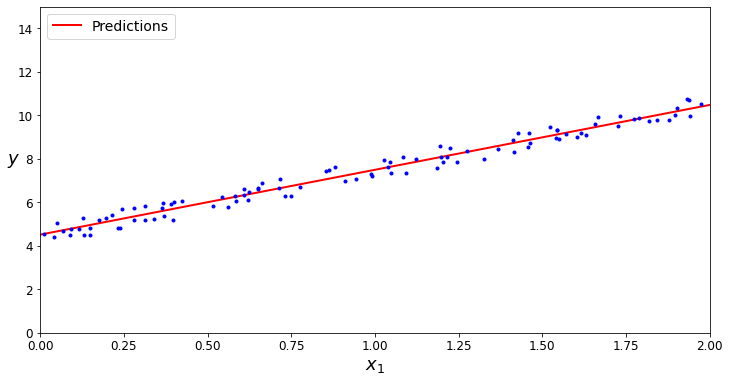

In [8]:
# let's plot this model predictions

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
_ = plt.legend(loc="upper left", fontsize=14)

In [9]:
# performing linear regression using scikit-learn is quite simple

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# display the bias term and the feature weights
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [10]:
# predict the value
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [11]:
# the LinearRegression class is based on the scipy.linalg.lstsqr() function
# which you could call directly
# this function computes using the pseudoinverse (or Moore-Penrose inverse)
# the pseudoinverse itself is computed using a standard matrix factorization technique called "Single Value Decomposition" (SVD)
# this approach is more efficient than computing the normal equation, plus it handles edge cases nicely

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

## Computational Complexity


The normal Equation computes the inverse of $X^TX$, which is an $(n+1)\times(n+1)$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O\left(n^{2.4}\right)$ to $O\left(n^3\right)$. If you double the number of features, you multiply the computational time by roughly $2^{2.4} = 8$.


The SVD approach used by scikit-learn's LinearRegression class is about $O\left(n^2\right)$. If you double the number of features, you multiply the computational time by roughly 4.


> Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g. 100,000). On the positive side, both are linear with regards to the number of instances in the training set, so they handle large training sets efficiently, provided they can fit in memory.


Also, once you have trained your Linear Regression model, predictions are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features (i.e. making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time).

---


Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

# Gradient Descent


**Gradient Descent** is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.


> It measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached the minimum!


Concretely, you start by filling $\theta$ with random values (this is called **random initialization**), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g. the MSE), until the algorithm **converges** to a minimum.


An important parameter in Gradient Descent is the size of the steps, determined by the **learning rate** hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, the algorithm might diverge, with larger and larger values, failing to find a good solution (minimum).


Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult.


Fortunately, the MSE cost function for a Linear Regression model happens to be a **convex function**, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a greate consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).


In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Therefore, when using Gradient Descent, you should ensure that all features have a similar scale, or else it will take much longer to converge.


**Conclusion**: 
- training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model's **parameter space**: the more parameters a model has, the more dimensions this space has, and the harder the search is. Fortunately, since the cost function is convex in the case of Linear Regression, the result will always exist.

---

## Batch Gradient Descent


To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta$ just a little bit. This is called **partial derivative**.


Partial derivatives of the cost function:
> $\dfrac{\partial}{\partial\theta_j}MSE(\theta) = \dfrac{2}{m}\displaystyle\sum_{i=1}^{m}\left(\theta^Tx^{(i)}-y^{(i)}\right)x_j^{(i)}$


Instead of computing these partial derivatives individually, you can use the notation of gradient vector $\nabla_\theta MSE(\theta)$, which contains all the partial derivatives of the cost function (one for each model parameter).


Once you have the gradient vector, which go uphill, just go in the opposite direction to go downhill. This mean subtracting $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the **learning rate** $\eta$ comes into play; multiply the gradient vector by $\eta$ to determine the size of the downhill step.


Gradient Descent step:
> $theta^{\left(\text{next step}\right)} = \theta - \eta\nabla_\theta MSE(\theta)$

In [12]:
# let's look at a quick implementation of this algorithm

eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of instances

theta = np.random.rand(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# let's look at the result
theta

array([[4.51359766],
       [2.98323418]])

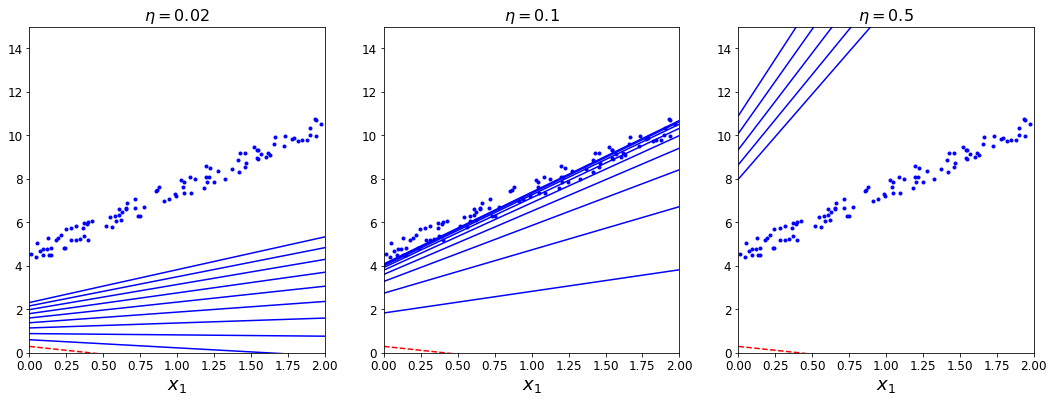

In [13]:
# what if you want to use a different learning rate eta
# let's plot the first 10 steps of Gradient Descent using three different learning rates
# the dashed line represents the starting point


theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.") # plot the data cluster
    
    # calculate the theta
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10: # plot the first 10 step
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--" # first line is dashed red
            plt.plot(X_new, y_predict, style)

        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(18, 6))
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

# on the left, the learning rate is too low: 
#   # the algorithm will eventually reach the solution, but it will take a long time
# in the middle, the learning rate looks pretty good: 
#   # in just a few iterations, it has already converged to the solution
# on the right, the learning rate is too high: 
#   # the algorithm diverges, jumping all over the place and actually getting further away from the solution at every step

### Convergence Rate


You may wonder how to set the number of iterations. 
- If it is too low, you will still be far away from the optimal solution when the algorithm stops.
- If it is too high, you will waste time while the model parameters do not change anymore. 


A simple solution is to set a very large number of iterations but to interupt the algorithm when the gradient vector becomes tiny - that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the **tolerance**) - because this happens when the Gradient Descent has (almost) reached the minimum.


When the cost function is convex and its slope does not change abruptly (as is the case for the MSE function). Batch Gradient Descent with a fixed learning rate ($\eta$) will eventually converge to the optimal solution, but you may have to wait a while: it can take $O(1/\epsilon)$ iterations to reach the optimum minimum within a range of $\epsilon$ depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

---

## Stochastic Gradient Descent


The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradient at every step, which makes it very slow when the training set is large. At the opposite extremem, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.
- Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm).
- On the other hand, due to its stochastic (i.e. random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameters values are good, but not optimal.


When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.


Therefore, randomness is good to escape from local minima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate ($\eta$). 
- The steps start out large (which helps make quick progress and escape local minima).
- Then get smaller and smaller, allowing the algorithm to settle at the global minimum.
- The function that determines the learning rate at each iteration is called the **learning schedule**. 

In [14]:
# let's implement Stochastic Gradient Descent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
# by convention we iterate by rounds of m iterations; each round is called an epoch
# while Batch Gradient Descent code iterated 1000 times through the whole training set
# this code goes through the training set only 50 times and reaches a fairly good solution
theta

array([[4.51968313],
       [2.98473191]])

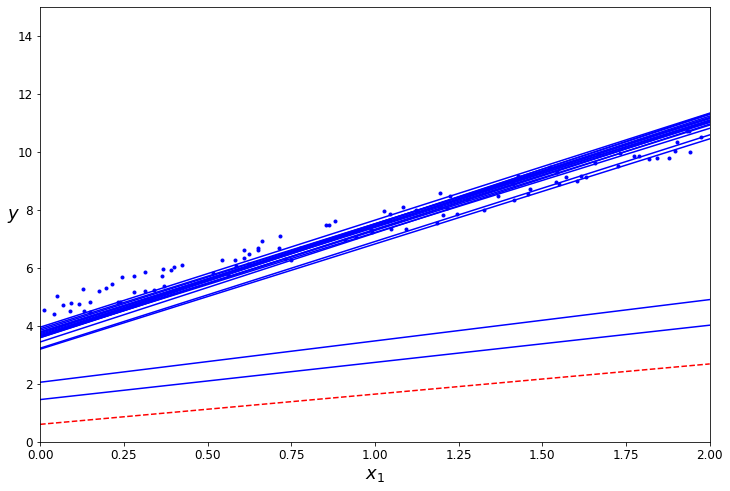

In [15]:
# let's plot the first 20 steps of this algorithm (the same parameter)

theta_path_sgd = []
m = len(X_b)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

fig, ax = plt.subplots(figsize=(12, 8))

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20: # plot the first 20 steps            
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--" # first line is dashed red       
            plt.plot(X_new, y_predict, style)        

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)         
_ = plt.axis([0, 2, 0, 15])            

# note that since instances are picked randomly
# some instances may be picked several times per epoch while others may not be picked at all
# if you want to be sure that the algorithm goes through every instance at each epoch
# another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly)
# then go through it instance by instance, then shuffle it again, and so on
# however, this generally converges more slowly                 

In [16]:
# to perform Linear Regression using SGD with scikit-learn, you can use the SGDRegressor class
# which defaults to optimizing the squared error cost function

# the following code:
#   # runs for maximum 1000 epochs 
#   # or until the loss drops by less than 1e-3 during one epoch
#   # starts with a learning rate of 0.1
#   # using the default learning schedule (different from the preceding one)
#   # does not use any regularization

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [17]:
# let's check the bias term and the feature weights
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51603434]), array([3.00059188]))

## Mini-batch Gradient Descent


The last gradient Descent we will look at is called **Mini-batch Gradient Descent**. It is quite simple to understand once you know Batch and Stochastic Gradient Descent:
- At each step, Mini-batch GD computes the gradients on *small random sets* of instances called **mini-batches**.
- The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.


The algorithm's progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But on the other hand, it may be harder for it to escape from local minima.

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000 # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m) 
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
# let's check the result
theta

array([[4.51876305],
       [2.99370357]])

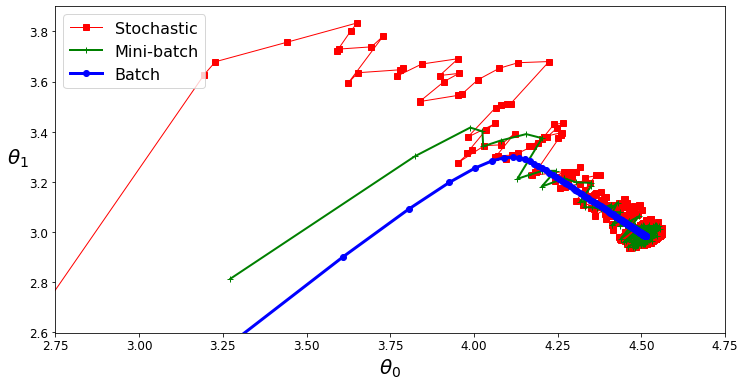

In [19]:
# the following plot shows the paths taken by the 3 Gradient Descent algorithms in parameter space during training

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(12, 6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
_ = plt.axis([2.75, 4.75, 2.6, 3.9])

# Polynomial Regression


What if your data is actually more complex than a simple straight line? Suprisingly, you can actually use a linear model to fit non-linear data. 
- A simple way to do this is to add powers to each feature as new features, then train a linear model on this extended set of features.
- This technique is called **Polynomial Regression**.

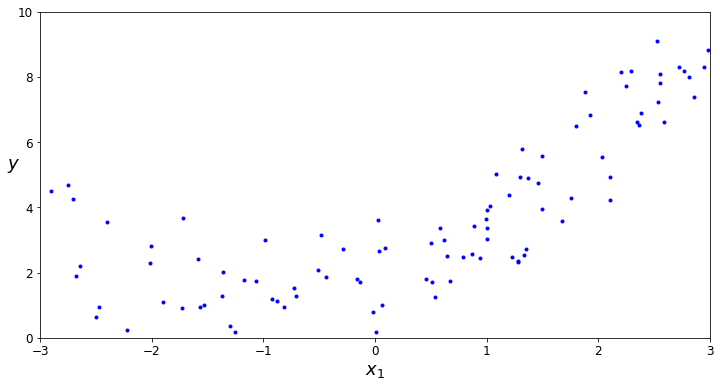

In [20]:
# let's first create some nonlinear data, based on a simple quadratic equation (plus some noise)
# y = 0.5 * x^2 + x + 2

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# let's plot this data

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
_ = plt.axis([-3, 3, 0, 10])

In [21]:
# clearly a straight line will never fit this data properly 
# so let's use scikit-learn's PolynomialFeatures to transform our training data
# adding the squared of each feature in the training set as new features

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0]) 
print(list(X_poly[0])) # the squared feature has been added 

[1.46177207]
[1.4617720716044804, 2.1367775893228544]


In [22]:
# now you can fit a LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# let's check the bias term and the feature weights
lin_reg.intercept_, lin_reg.coef_

(array([1.77924882]), array([[0.98852819, 0.52467349]]))

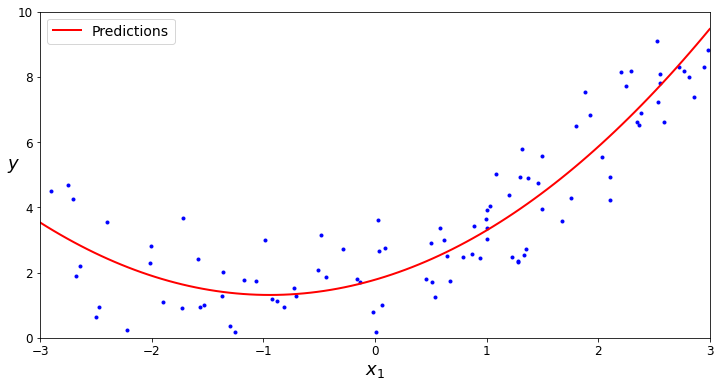

In [23]:
# let's plot the predictions

fig, ax = plt.subplots(figsize=(12, 6))

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
_ = plt.axis([-3, 3, 0, 10])

# Learning Curves


If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. But in general, you won't know what function generated the data,so:
- How can you decide how complex your model should be? 
- How can you tell that your model is overfitting or underfitting the data?


In chapter 2, we used **cross-validation** to get an estimate of a model's generalization performance. This is one way to tell when a model is too simple or too complex: 
- If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then you model is overfitting.
- If it performs poorly on both, then it is underfitting. 


Another way is to look at the **learning curves**: 
- These are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration).
- To generate the plots, simply train the model several times on different sized subsets of the training set.

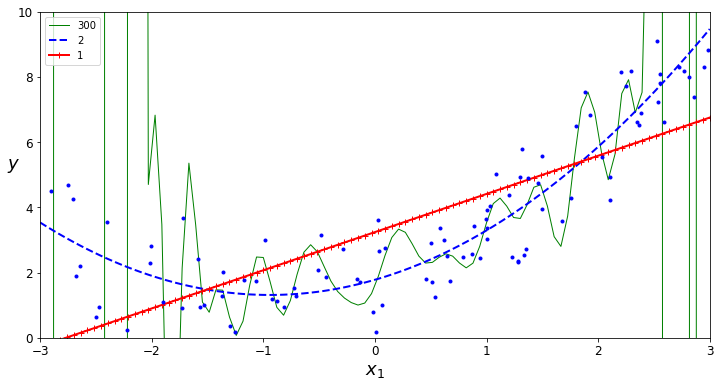

In [24]:
# the following code plot a 300-degree, 2-degree, 1-degree polynomial on the preceding dataset
# to visualize when a model is overfitting (underfitting)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

fig, ax = plt.subplots(figsize=(12, 6))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler() # scale the data down so it's easier to plot
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new) 
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([-3, 3, 0, 10])

In [25]:
# the following code defines a function that plots the learning curves of a model given some training data

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    fig, ax = plt.subplots(figsize=(12, 6))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # train the model
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # plot the results
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

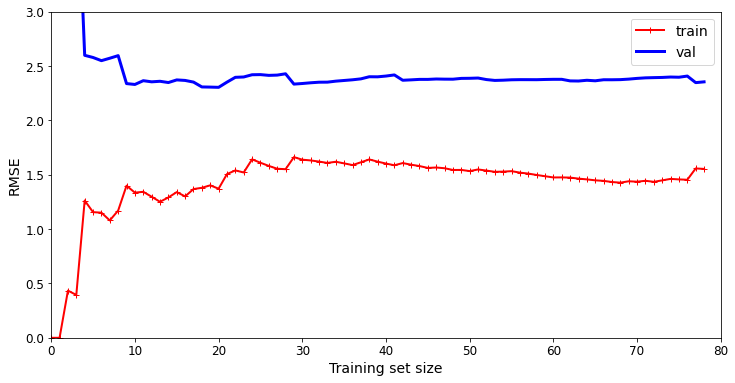

In [26]:
# let's look at the learning curves of the plain Linear Regression model 
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
_ = plt.axis([0, 80, 0, 3])

# these learning curves are typical of an underfitting model
# both curves have reached a plateau; they are close and fairly high

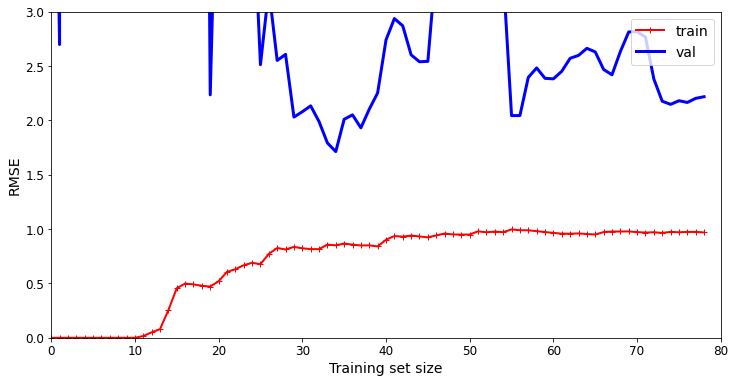

In [27]:
# now let's look at the learning curves of a 10-degree polynomial model on the same data

from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(poly_reg, X, y)
_ = plt.axis([0, 80, 0, 3])

# the error on the training data is much lower than with the Linear Regression model
# there is a gap between the curves
# this mean that the model performs significantly better on the training data than on the validation data
# which is the hallmark of an overfitting model

## The Bias/Variance Tradeoff


An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:


**Bias**:
- This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.


**Variance**:
- This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.


**Irreducible Error**: 
- This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g. fix the data sources, such as broken sensors, or detect and remove outliers).


Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases it bias and reduces its variance. This is why it is called a tradeoff.

---

# Regularized Linear Models


As we saw in Chapter 1 and 2, a good way to reduce overfitting is to regularize the model (i.e. to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.


For a linear model, regularization is typically achieved by constraining the weights of the model. We will look at 3 models which implement three different ways to constrain the weights.
- Ridge Regresison
- Lasso Regression
- Elastic Net

---

## Ridge Regression


**Ridge Regression** (also called *Tikhonov regularization*) is a regularized version of Linear Regression: 
- A **regularization term** equal to $\alpha\displaystyle\sum_{i=1}^{n}\theta_i^2$ is added to the cost function.
- This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
- The hyperparameter $\alpha$ controls how much you want to regularize the model.
    - If $\alpha = 0$ then Ridge Regression is just Linear Regression.
    - If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.


Ridge Regression cost function:
> $J(\theta) = MSE(\theta) + \dfrac{1}{2}\alpha\displaystyle\sum_{i=1}^{n}\theta_i^2$

**Notation**:
- Note that the bias term $\theta_0$ is not regularized (the sum starts at $i=1$, not 0).
- If we define $\bold{w}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is $\dfrac{1}{2}\left(\| \bold{w} \|\right)^2$
    - $\| \bold{w} \|$ represent the $l_2$ norm of the weight vector.
- For Gradient Descent, just add $\alpha\bold{w}$ to the MSE gradient vector.

>> **Note for all algorithms**:
>> - The regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.  

In [28]:
# let's first create some test data

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

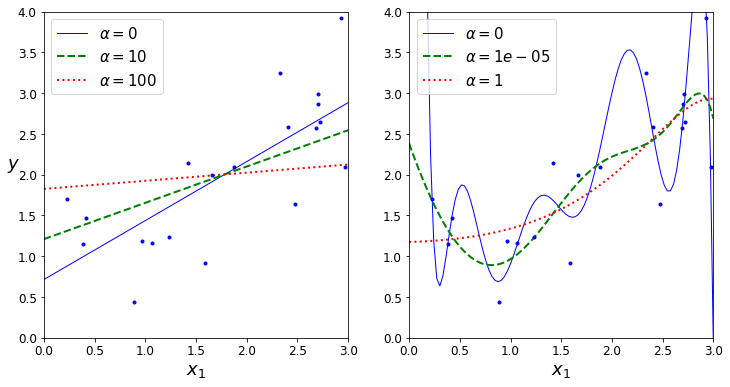

In [29]:
# the following plots show several Ridge models trained on some linear data using different alpha value
# on the left: plain Ridge models are used, leading to linear predictions
# on the right: 
#   # first, the data is expanded using PolynomialFeatures(degree=10)
#   # then, it is scaled using a StandardScaler()
#   # finally, the Ridge models are applied to the resulting features

# note how increasing alpha leads to flatter (i.e. less extreme, more reasonable) predictions
# this reduces the model's variance but increases its bias

from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        if polynomial: # you only apply transfomation to polynomial regression
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y) # train the model
        
        # predict the values
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3) # plot the data
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])


plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

### Ridge Regression using Closed-form equation/Gradient Descent


Ridge Regression closed-form solution:
> $\hat{\theta} = \left(X^TX+\alpha A\right)^{-1}X^Ty$


**Notation**:
- $A$: is the $(n + 1)\times(n + 1)$ *identity matrix* except with a 0 in the top-left cell, corresponding to the bias term.

In [30]:
# here is how to perform Ridge Regression with scikit-learn using a closed-form solution
# by implementing a matrix factorization technique by André-Louis Cholesky

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[1.81150323]])

In [31]:
# and here is how to perform Ridge Regression using Stochastic Gradient Descent
# the 'penalty' hyperparameter sets the type of regularization term to use
# specifying "l2" indicates that 
# you want SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector
# this is simply Ridge Regression

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([1.70720217])

## Lasso Regression


**Least Absolute Shrinkage and Selection Operator Regression** (simply called **Lasso Regression**) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_1$ norm of the weight vector instead of half square of the $l_2$ norm.


Lasso Regression cost function:
> $J(\theta) = MSE(\theta) + \alpha\displaystyle\sum_{i=1}^n\left|\theta_i\right|$


An important characteristic of Lassa Regression is that it tends to completely eliminate the weights of the least important features (i.e. set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a **sparse model** (i.e. with few nonzero feature weights).

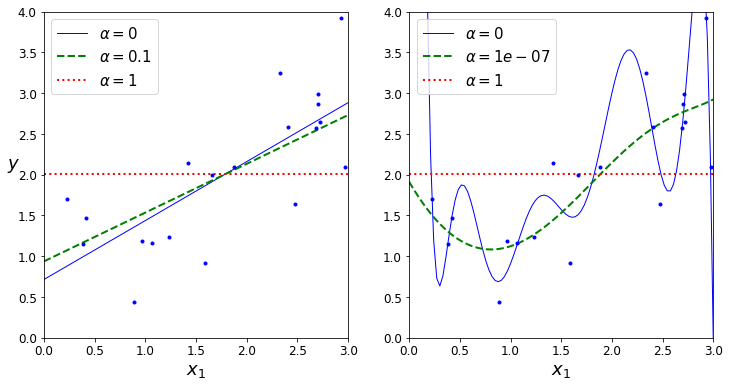

In [32]:
# these plots show the same things as Ridge Regression 
# but replace the Ridge models with Lasso models and uses smaller alpha values

from sklearn.linear_model import Lasso

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42, max_iter=1000)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42, max_iter=1000)

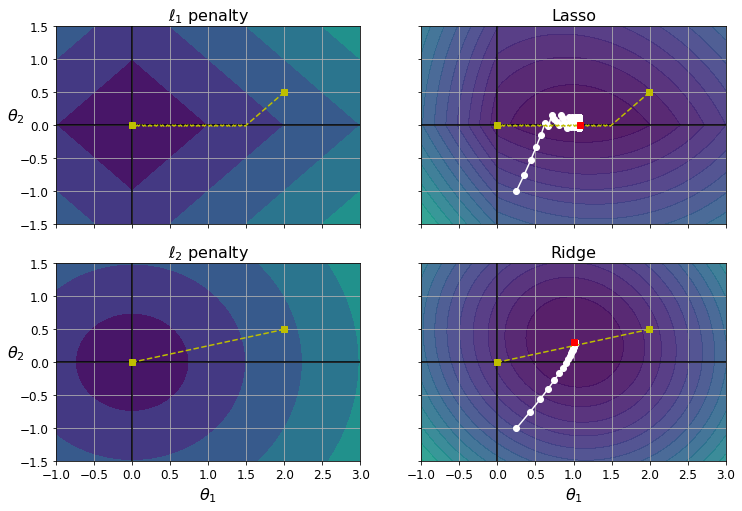

In [40]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

# create a figure
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))

for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

In [34]:
# here is a small scikit-learn example using the Lasso class
# note that you could instead use SGDRegressor(penalty="l1")

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([1.83474087])

## Elastic Net


**Elastic Net** is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the **mix ratio** $r$. 
- When $r=0$, Elastic Net is equivalent to Ridge Regression.
- When $r=1$, Elastic Net is equivalent to Lasso Regression.


Elastic Net cost function:
> $J(\theta)=MSE(\theta)+r\alpha\displaystyle\sum_{i=1}^{n}|\theta_i| + \left(\dfrac{1-r}{2}\right)\alpha\displaystyle\sum_{i=1}^{n}\theta_i^2$


So when should you use plain Linear Regression, Ridge, Lasso, or Elastic Net? 
- It is almost always preferable to have a little bit of regularization, so:
    - Generally you should avoid plain Linear Regression. 
- Ridge is a good default, but:
    - If you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero as we have discussed.
- In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when:
    - The number of features is greater than the number of training instances
    - Several features are strongly correlated.

In [35]:
# here is a short example using sklearn's ElasticNet 
# l1_ratio corresponds to the mix ratio r

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([1.82808392])

## Early Stopping 


A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called **early stopping**. 

In [36]:
# let's first create some data to demonstrate this algorithm
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [37]:
# from copy import deepcopy
from sklearn.base import clone 

# here is a basic implementation of early stopping


# here we use a high-degree polynomial regression model
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# create a model
# with warm_start=True, when the fit() method is called
# it just continues training where it left off instead of restarting from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # train the model
    
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        # best_model = deepcopy(sgd_reg)
        best_model = clone(sgd_reg)

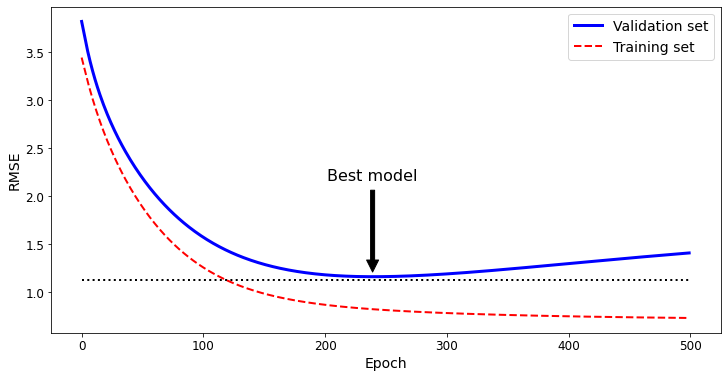

In [38]:
# create a plot that demonstrate early stopping
# using a high-degree polynomial regression model
# and trained using the Batch Gradient Descent algorithm

fig, ax = plt.subplots(figsize=(12, 6))

# create a model 
# with warm_start=True, when the fit() method is called
# it just continues training where it left off instead of restarting from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)


n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train) # train the model
    
    # calculate the scores on train/validation sets
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# pick out the best RMSE score
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# plot the graph

# plot the text/arrows
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center", arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)

# plot the min line
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)

plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
_ = plt.legend(loc="upper right", fontsize=14)
_ = plt.xlabel("Epoch", fontsize=14)
_ = plt.ylabel("RMSE", fontsize=14)

# Logistic Regression


As we discussed in Chapter 1, some regression algorithms can be used for classification as well (and vice-versa).


**Logistic Regression** (also called *Logit Regression*) is commonly used to estimate the probability that an instance belongs to a particular class.
- If the estimated probability $p > 50%$: 
    - The model predicts that the instance belongs to that class.
    - Called the *positive class*, labeled "1".
- If the estimated probability $p \leqslant 50%$:
    - The model predicts that the instance does not belongs to that class.
    - Called the *negative class*, labeled "0".
> This makes it a binary classifier.

---

## Estimate Probabilities


Just like Linear Regression, Logistic Regression computes a weighted sum of the input features (plus a bias term), but instead of outputing the result directly like the Linear Regression model does, it outputs the **logistic** of this result.


Logistic Regression model estimated probability (vectorized form):
> $\hat{p}=h_\theta(x)=\sigma\left(x^T\theta\right)$


**Notation**:
- The logistic $\sigma(.)$: is a **sigmoid function** that outputs a number between 0 and 1.
- Logistic function: $\sigma(t) = \dfrac{1}{1 + \exp(-t)}$


Once the Logistic Regression model has estimated the probability $\hat{p}=h_\theta(x)$, it can make its predictions easily.


Logistic Regression model prediction:
> $\hat{y} = \left\{\begin{array}{ll}0 \hspace{5px}\text{if}\hspace{5px} \hat{p} < 0.5 \\ 1 \hspace{5px}\text{if}\hspace{5px} \hat{p} \leqslant 0.5\end{array} \right.$

---

## Training and Cost Function


The object of training is to set the parameter vector $\theta$ so that the model estimates:
- High probabilities for positive instances ($y=1$).
- Low probabilities for negative instances ($y=0$).


This idea is captured by the following cost function for a single training instance $x$.


Cost function of a single training instance:
> $c(\theta) = \left\{\begin{array}{ll}-\log\left(\hat{p}\right)\hspace{22px}\text{if}\hspace{5px}y=1\\ -\log\left(1-\hat{p}\right)\hspace{5px}\text{if}\hspace{5px} y=0 \end{array}\right.$


The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression called the **log loss**.


Logistic Regression cost function (log loss):
> $J(\theta) = -\dfrac{1}{m}\displaystyle\sum_{i=1}^{m}\left[y^{(i)}\log\left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right)\log\left(1-\hat{p}^{(i)}\right)\right]$


- The bad news is that there is no known closed-form equation to compute the value of $\theta$ that minimizes this cost function. 
- The good news is that this cost function is convex, so Gradient Descent is guaranteed to find the global minimum.


Logistic cost function partial derivatives with regards to the $j^{th}$ model parameter $\theta_j$:
> $\dfrac{\partial}{\partial\theta_j}J(\theta) = \dfrac{1}{m}\displaystyle\sum_{i=1}^{m}\left(\sigma\left(\theta^Tx^{(i)}\right) - y^{(i)}\right)x_j^{(i)}$


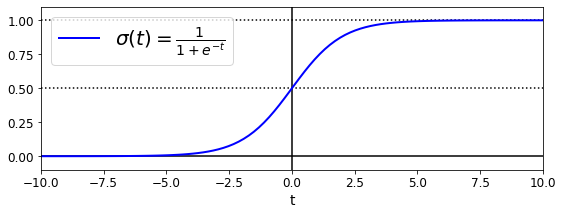

In [46]:
# logistic function

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2,
         label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
_ = plt.axis([-10, 10, -0.1, 1.1])

## Decsion Boundaries


Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

In [41]:
# let's try to build a classifier to detect the Iris-Virginica type based on the petal width feature.
# first let's load the data

from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [42]:
# now let's train a Logistic Regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

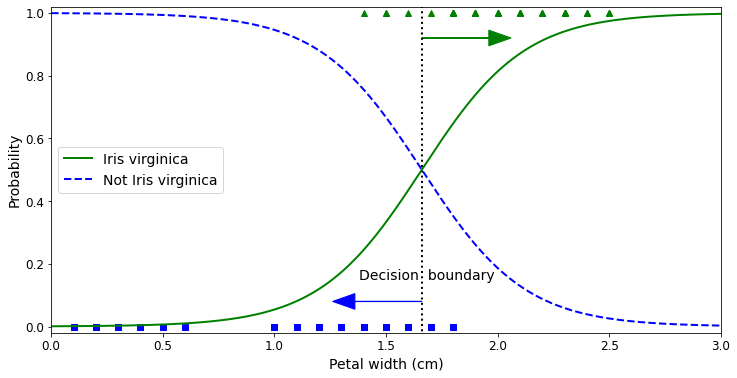

In [51]:
# let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 6))
# plot the instances (blue squares/green triangles)
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")

# plot the lines and arrows/text
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
_ = plt.axis([0, 3, -0.02, 1.02])

# the petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm
# while the other flowers ranging from 0.1 cm to 0.8 cm
# notice that there is a bit of overlap:
#   # above about 2 cm, the classifier is highly confident that the flower is an Iris-Virginica
#   # while below 1 cm it is highly confident that it is not Iris-Virginica
#   # in between these extremes, the classifier is unsure
# however, if you ask it to predict the class (using the predict() method rather than the predict_proba() method)
# it will return whichever class is the most likely 
# therefore, there is a "decision boundary" at round 1.6 cm where both probabilities is eual to 50%:
#   # the classifier will predict that the flower is an Iris-Virginica if the petal-width > 1.6 cm
#   # else it will predict that the flower is not an Iris-Virginica (even if it is not very confident)

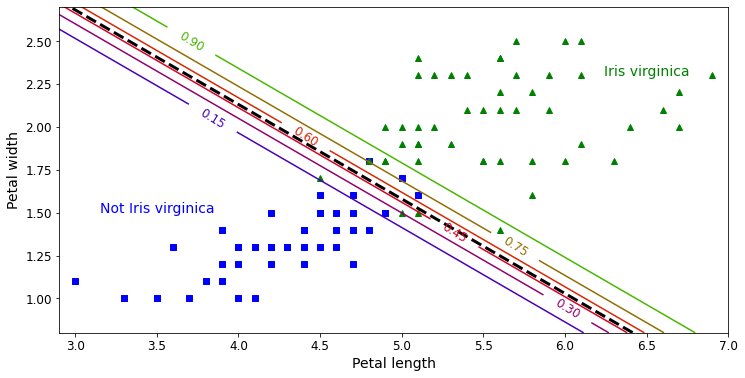

In [54]:
# this plot shows the same dataset but this time displaying two features: petal width and length
# once trained, the Logistic Regression classifier can 
# estimate the probabilitiy that a new flower is an Iris-Virginica based on these two features
# the dashed line represents the points where the model estimate a 50% probability (decision boundary)
# note that this is a linear boundary:
#   # each parallel line represents the points where the model outputs a specific probability 
#   # from 15% (bottom left) to 90% (top right)
#   # all the flowers beyond the top right line have an over 90% chance of being Iris-Virginica to the model (and vice-versa)

# get the data
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

# create and train the model
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1
))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

# plot the blue squares/green triangles
plt.figure(figsize=(12, 6))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
_ = plt.axis([2.9, 7, 0.8, 2.7])

# just like the other linear models, Logistic Regression models can be regularized using l1 or l2 penalties
# scikit-learn actually adds an l2 penalty by default

## Softmax Regression


The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression**, or **Multinomial Logistic Regression**.


The idea is quite simple:
- When given an instance $x$, the Softmax Regression model first computes a score $s_k(x)$ for each class $k$.
- Then estimates the probability of each class by applying the **softmax function**(also called **normalized exponential**) to the scores.


Softmax score for class $k$:
> $s_k(x) = x^T\theta^{(k)}$


**Note**:
- Each class has its own dedicated parameter vector $\theta^{(k)}$.
- All these vectors are typically stored as rows in a *parameter matrix* $\Theta$.


Once you have computed the score of every class for the instance $x$, you can estimate the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores through the softmax function: 
- It computes the exponential of every score.
- Then normalizes them (dividing by the sum of all the exponentials).
- The scores are generally called *logits* or *log-odds*.


Softmax function:
> $\hat{p}_k = \sigma\left(s(x)\right)_k = \dfrac{\exp\left(s_k(x)\right)}{\displaystyle\sum_{j=1}^{K}\exp\left(s_j(x)\right)}$


**Notation**:
- $K$: is the number of classes.
- $s(x)$: is a vector containing the scores of each class for the instance $k$.
- $\sigma\left(s(x)\right)_k$: is the estimated probability that the instance x belongs to class $k$, given the scores of each class for that instance.


Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).


Softmax Regression classifier prediction:
> $\hat{y} = \argmax\limits_k\ \sigma(s(x))_k = \argmax\limits_k\ s_k(x) = \argmax\limits_k\ \left(\left(\theta^{(k)}\right)^Tx\right)$


**Notation**:
- the $\argmax\limits_k$ operator returns the value of a variable that maximizes a function. 
    - In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(s(x))_k$

---

Now that you know how the model estimate probabilities and makes predictions, let's take a look at training. 
- The objective is to have a high probability for the target class (and consequently a low probability for the other classes).
- Minimizing the cost function called **cross entropy**, should lead to this objective because it penalizes the model when it estimates a low probability for a target class.
- Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes. (we will use it again sereval times in the following chapters).


Cross entropy cost function:
> $J(\Theta) = -\dfrac{1}{m}\displaystyle\sum_{k=1}^{K}y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)$


**Notation**:
- $y_k^{(i)}$: is the target probability that the $i^{th}$ instance belongs to class $k$.
    - In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.
- Notice that when there are just two classes ($K=2$), this cost function is equivalent to the Logistic Regression's cost function (log loss).


Cross entropy gradient vector for class $k$:
> $\large\nabla_{ \theta^{(k)}} J(\Theta) \normalsize = \dfrac{1}{m}\displaystyle\sum_{i=1}^{m}\left(\hat{p}_k^{(i)}-y_k^{(i)}\right)x^{(i)}$


Now you can compute the gradient vector for every class, then use Gradient Descent to find the parameter matrix $\Theta$ that minimizes the cost function.

In [56]:
# let's use Softmax Regression to classify the Iris flowers into all three classes
# sklearn's LogisticRegression uses one-versus-all by default when you train it on more than 2 classes
# but you can set the "multi_class" hyperparameter to "multinomial" to switch it to Softmax Regression instead
# you must also specify a solver that supports Softmax Regression, such as the "lbfgs"
# it also applies l2 regularization by default, which you can control using the hyperparameter "C"

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

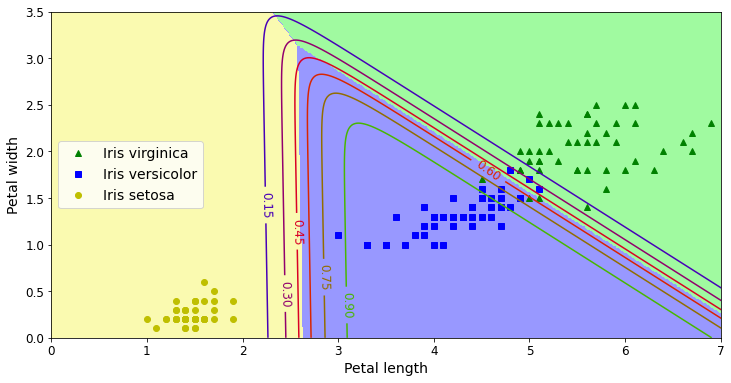

In [60]:
# this plot shows the resulting decision boundaries, represented by background colors
# notice that the decsion boundaries between any 2 classes are linear
# the plot also shows the probabilites for the Iris-Versicolor class (represented by the curved lines)

from matplotlib.colors import ListedColormap

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# plot the items
plt.figure(figsize=(12, 6))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

# plot the background colors
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# plot the curved lines
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)

plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
_ = plt.axis([0, 7, 0, 3.5])